# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [34]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [35]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [36]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [37]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [38]:
# Data Size
df.shape

(48842, 15)

In [39]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [40]:
# Jawab Soal 1
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Variabel yang memiliki data hilang adalah workclass dengan jumlah 963 data hilang, ocuupation dengan 966 data hilang, dan native-country dengan 274 data hilang.

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [42]:
# Jawab Soal 2
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Karena data yang hilang memiliki tipe non-numerik atau categorical maka saya mengisi value value kosong menggunakan modus ([0] menunjukkan jika ada lebih dari satu modus maka akan mengambil modus di index pertama), dan setelah diisi tidak ada lagi data yang hilang.

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

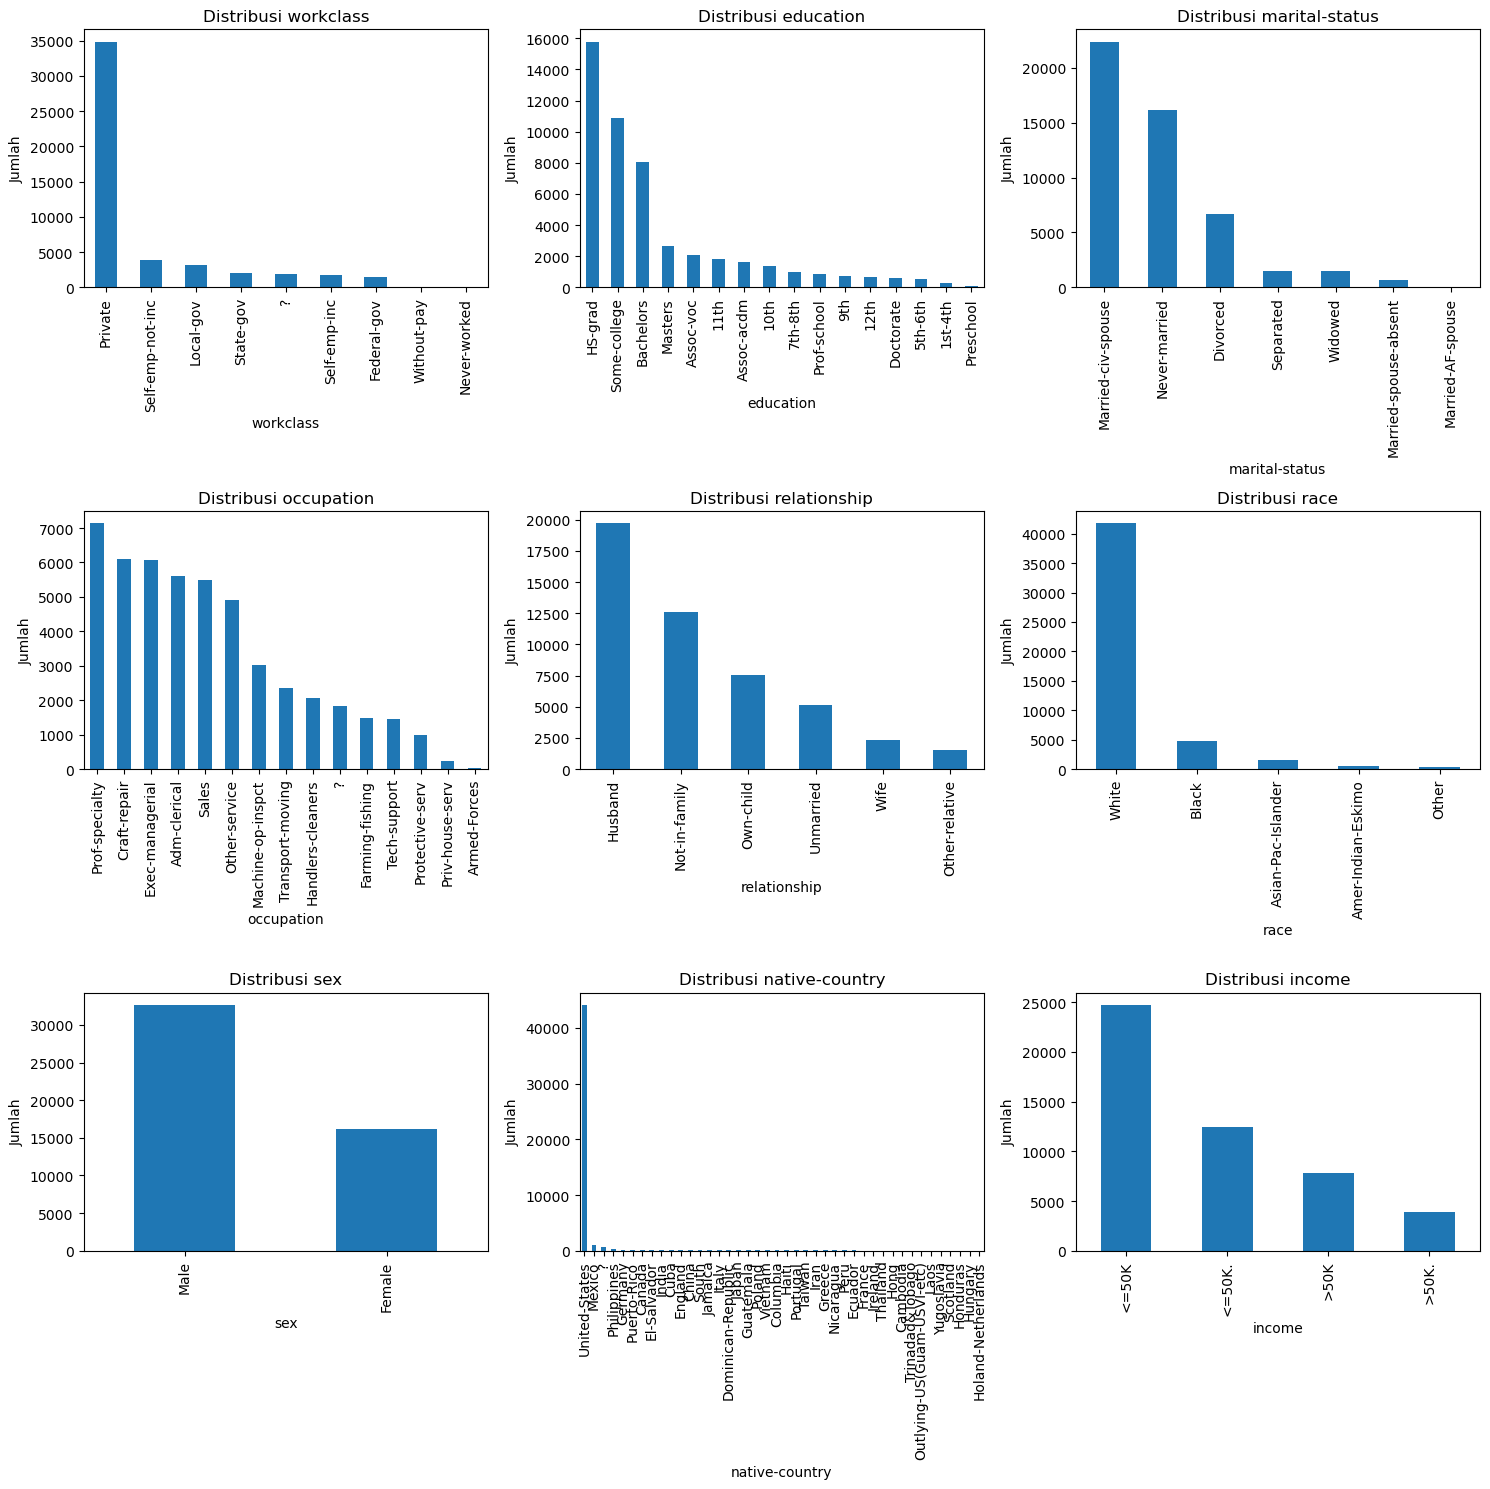

In [43]:
# Jawab Soal 3
cat_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

Dari inspeksi variabel kualitatif menggunakan barchart, terdapat beberapa value yang tidak sesuai seperti "?" pada variabel workclass, occupation, dan native-country. Dan dari inspeksi tersebut ditemukan adanya duplikasi pada income.

In [44]:
for col in cat_cols:
    df[col] = df[col].replace('?', "Others")

df['income'] = df['income'].replace('<=50K.', '<=50K').replace('>50K.', '>50K')

Setelah diganti others hasilnya akan seperti berikut

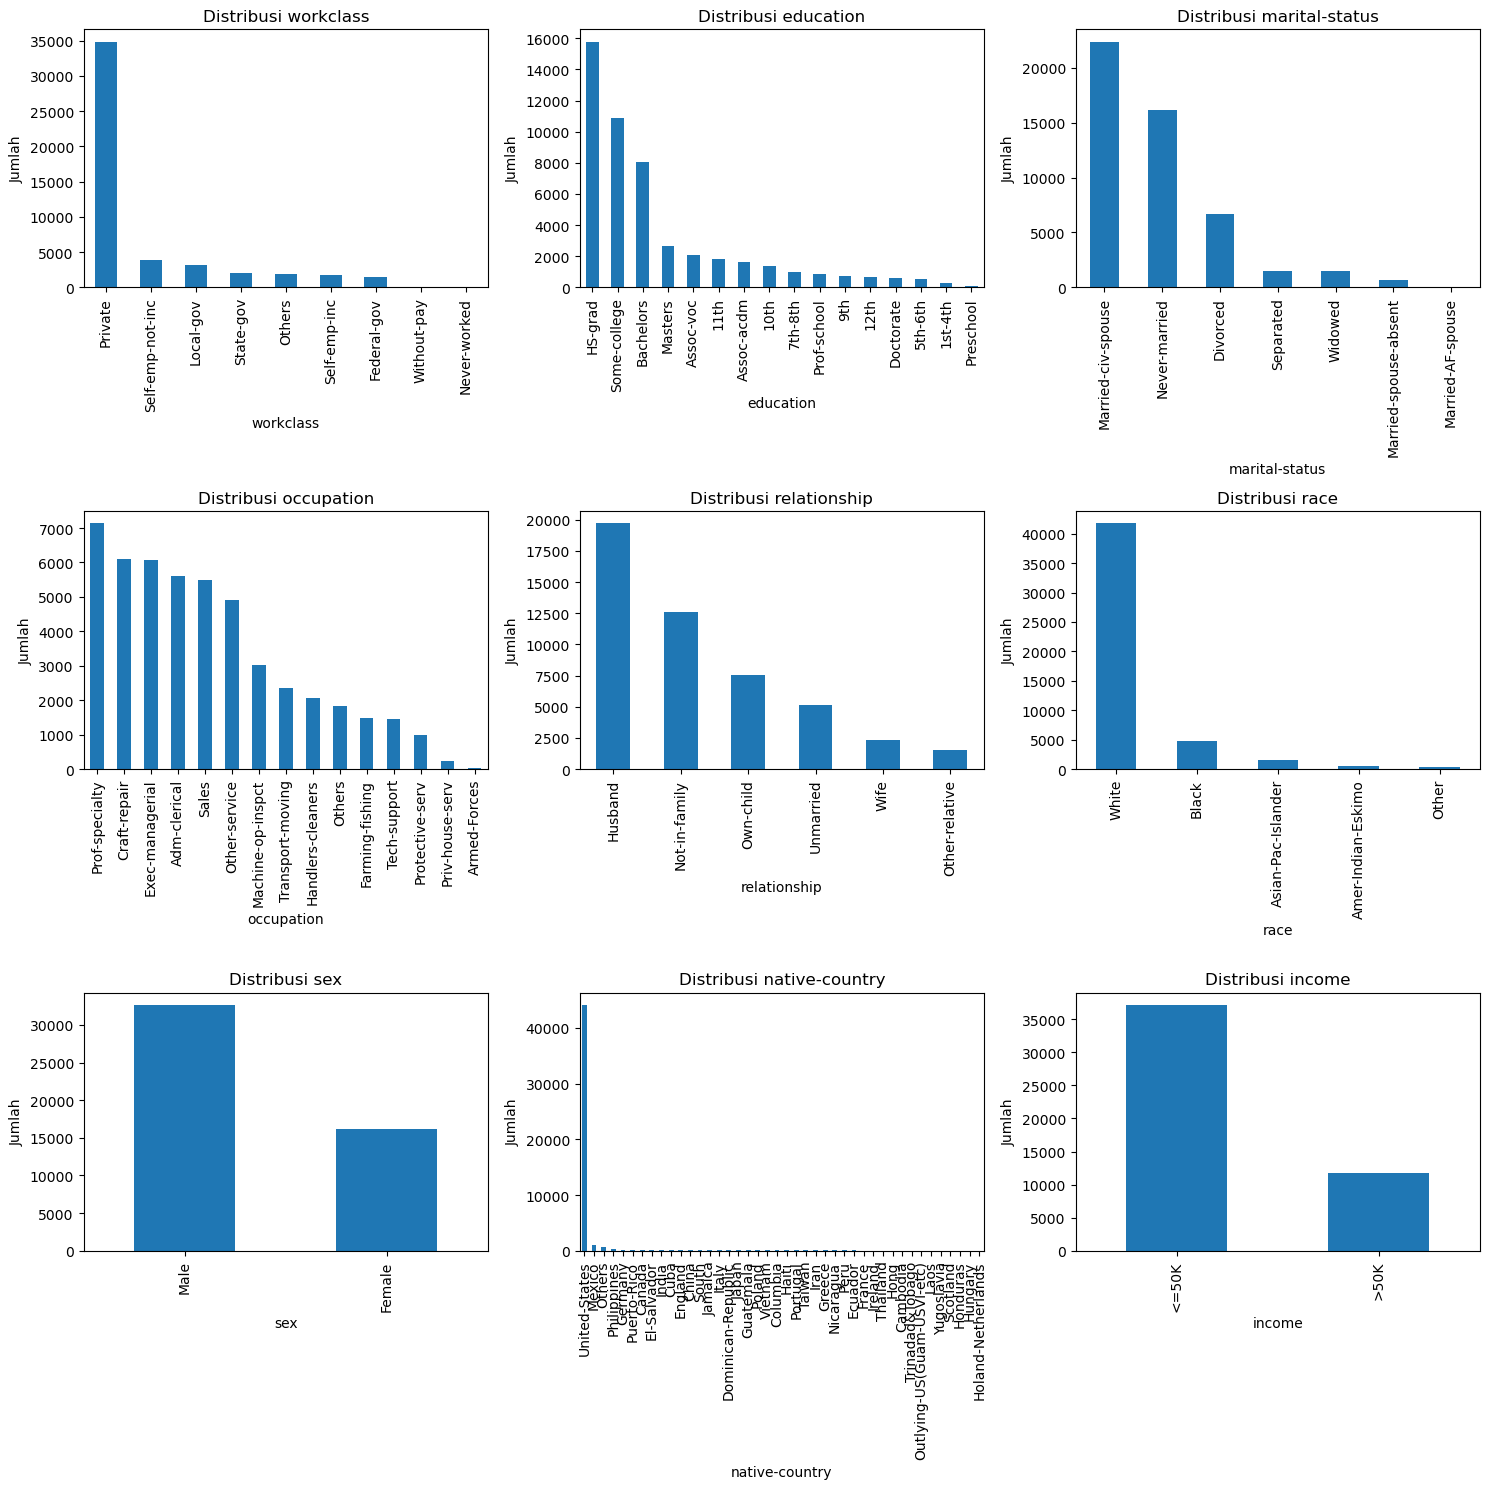

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

<Axes: ylabel='Frequency'>

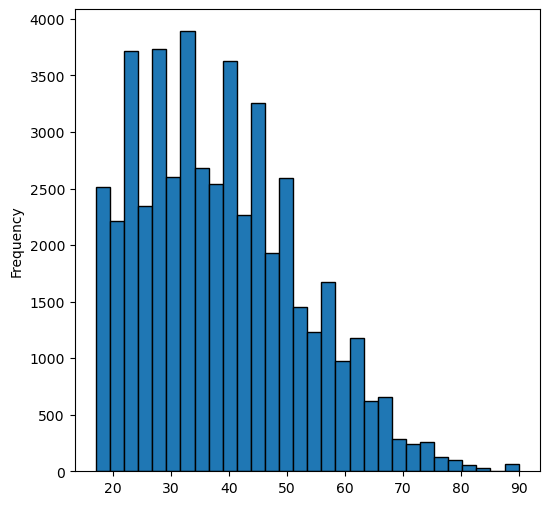

In [46]:
# Jawab 1.1 - Histrogram
df['age'].plot(kind='hist', bins=30, edgecolor='black', figsize=(6, 6))

<Axes: xlabel='education'>

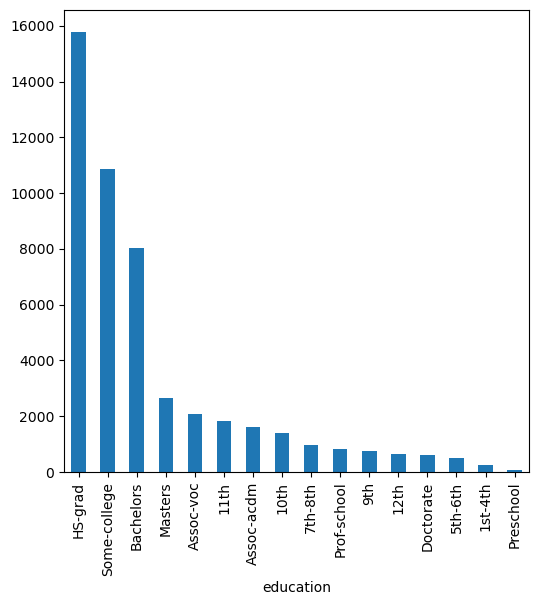

In [47]:
# Jawab 1.2 - Barchart
df['education'].value_counts().plot(kind='bar', figsize=(6, 6))

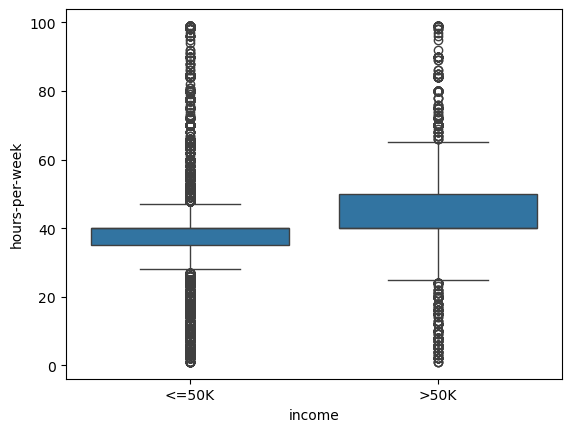

In [48]:
# Jawab 1.3 - Boxplot
sns.boxplot(x=df['income'], y=df['hours-per-week'], data=df)
plt.show()

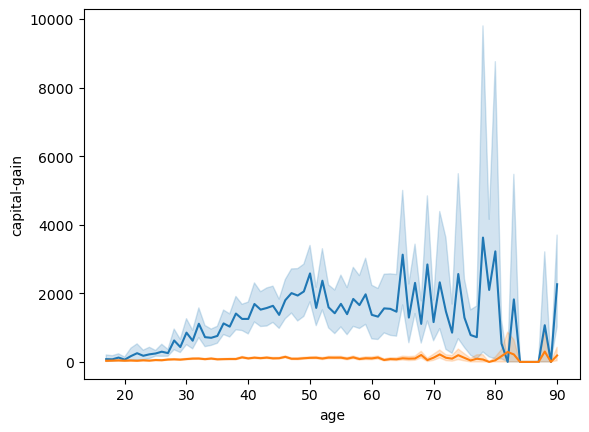

In [49]:
# Jawab 1.4 - Lineplot
sns.lineplot(x=df['age'], y=df['capital-gain'])
sns.lineplot(x=df['age'], y=df['capital-loss'])
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [50]:
# Jawab dengan komentar python

'''
  1. Distribusi age tidak normal namun right-skewed (condong ke kanan) dengan mayoritas individu berusia antara 20 hingga 50 tahun.
  2. Untuk kasus right skewed, menurut saya lebih baik menggunakan median sebagai ukuran pemusatan data karena median lebih tahan terhadap outlier dibandingkan mean.
  3. Berdasarkan boxplot, income <=50k memiliki lebih banyak outlier dibandingkan income >50k. Hal ini dapat dilihat dari jumlah titik di luar whisker pada boxplot.
'''

'\n  1. Distribusi age tidak normal namun right-skewed (condong ke kanan) dengan mayoritas individu berusia antara 20 hingga 50 tahun.\n  2. Untuk kasus right skewed, menurut saya lebih baik menggunakan median sebagai ukuran pemusatan data karena median lebih tahan terhadap outlier dibandingkan mean.\n  3. Berdasarkan boxplot, income <=50k memiliki lebih banyak outlier dibandingkan income >50k. Hal ini dapat dilihat dari jumlah titik di luar whisker pada boxplot.\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [51]:
# Jawab Soal 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['sex'] = le.fit_transform(df['sex']) 
df['income'] = le.fit_transform(df['income']) 

In [52]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex  \
0       Never-married       Adm-clerical  Not-in-family  White    1   
1  Married-civ-spouse    Exec-managerial        Husband  White    1   
2            Divorced  Handlers-cleaners  Not-in-family  White    1   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    1   
4  Married-civ-spouse     Prof-specialty           Wife  Black    0   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

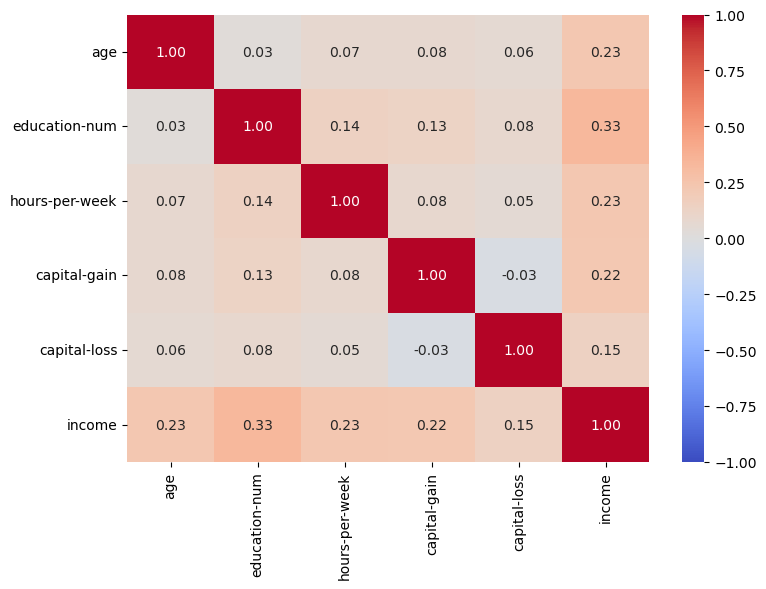

In [53]:
# Jawab Soal 1
selected_features = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
df_selected = df[selected_features]
corr = df_selected.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f") 
plt.tight_layout()
plt.show()

In [54]:
# Hasil analisis jelaskan pada cell ini
'''
Variabel paling berhubungan dengan pendapatan (income) adalah education-num, disusul oleh age, hours-per-week, dan capital-gain.

Korelasinya semua positif tapi tidak ada yang sangat kuat (semuanya di bawah 0.5), artinya faktor-faktor lain di luar variabel ini juga berperan penting dalam menentukan pendapatan.
'''

'\nVariabel paling berhubungan dengan pendapatan (income) adalah education-num, disusul oleh age, hours-per-week, dan capital-gain.\n\nKorelasinya semua positif tapi tidak ada yang sangat kuat (semuanya di bawah 0.5), artinya faktor-faktor lain di luar variabel ini juga berperan penting dalam menentukan pendapatan.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [55]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


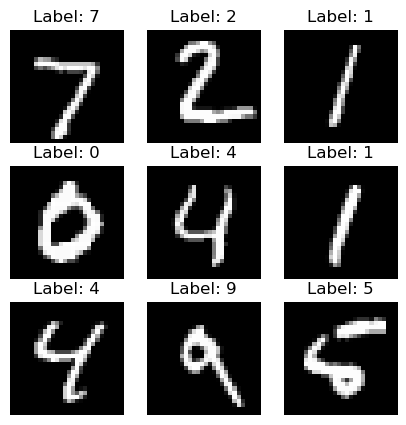

In [56]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Upsampled test shape: (10000, 32, 32)


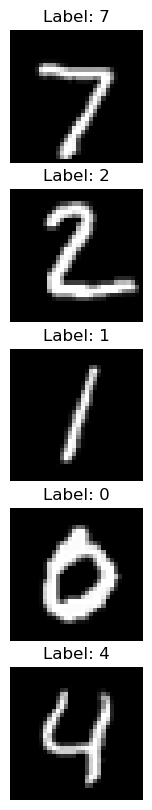

In [57]:
# Jawab Soal 1
import cv2

X_test_up  = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Upsampled test shape:", X_test_up.shape)

plt.figure(figsize=(5, 10))
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(X_test_up[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [58]:
# Jawab Soal 2
X_test_up_norm = X_test_up.astype('float32') / 255.0

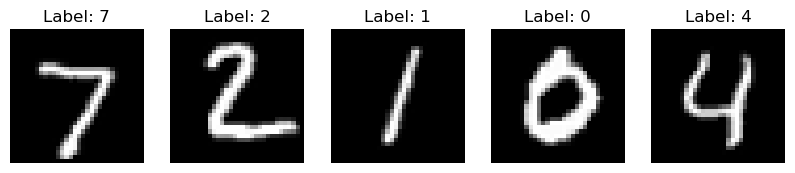

In [59]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_up_norm[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [60]:
# Jawab Soal 3
# Kerjakan pada cell ini

from PIL import Image

X_test_hist = np.zeros((X_test_up_norm.shape[0], 256))  

for i in range(X_test_up_norm.shape[0]):
    img = Image.fromarray((X_test_up_norm[i] * 255).astype(np.uint8), mode="L")
    hist = img.histogram() 
    X_test_hist[i] = np.array(hist)
    print(f"Histogram fitur gambar ke-{i+1}: {hist}")

print("Shape fitur histogram (grayscale):", X_test_hist.shape)


Histogram fitur gambar ke-1: [840, 8, 4, 2, 4, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 3, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 3, 1, 2, 1, 5, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 3, 0, 1, 0, 31]
Histogram fitur gambar ke-2: [769, 7, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 3, 2, 0, 2, 3, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 3, 2, 3, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0,